In [1]:
#implementation of K means algorithm
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#Spliting of dataset
from sklearn.model_selection import train_test_split
data = pd.read_csv('Admission_Predict.csv')
data=data.drop('Serial No.',axis=1)
data.head()

,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


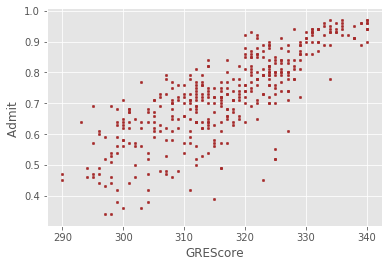

In [3]:
f1 = data['GREScore'].values
f2 = data['Admit '].values
X = np.array(list(zip(f1, f2)))
plt.xlabel('GREScore')
plt.ylabel('Admit ')
plt.scatter(f1, f2, c='brown', s=6)
plt.show()

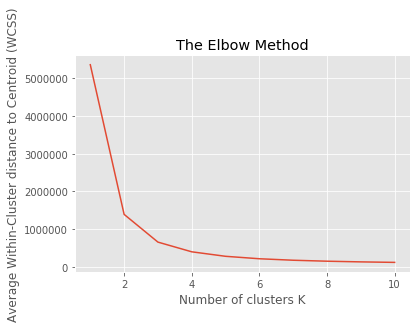

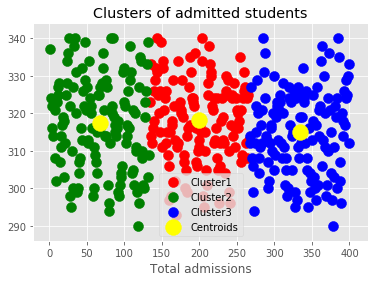

In [4]:
# K-Means Clustering

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing tha customer Expenses Invoices dataset with pandas
dataset=pd.read_csv('Admission_Predict.csv')
X=dataset.iloc[: , 0:5].values

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')
plt.savefig('elbow.png')
plt.show()

# Applying k-means to the mall dataset
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 200, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Cluster1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='Cluster2')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')
plt.title('Clusters of admitted students')
plt.xlabel('Total admissions')
#plt.ylabel('Total ')
plt.legend()
plt.savefig('kmeans.png')
plt.show()


In [5]:
#implementing naive bayes classifier
# importing libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('Admission_predict_Ver1.3.csv', encoding = 'latin-1')

In [7]:
data.columns

Index(['Serial No.', 'GREScore', 'TOEFLScore', 'University Rating', 'Admit'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
#x=data.iloc[:,:1].values
#y=data.iloc[:,:-1].values
y=data.Admit

x=data.drop(['Admit'], axis=1)
# x=data.drop('Serial No.',axis=1)
# x=data.drop('Research',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [10]:
x_train.shape

(199, 4)

In [11]:
x_test.shape


(200, 4)

In [12]:
y_test.shape

(200,)

In [13]:
y_train.shape

(199,)

In [14]:
#for removing null values


data=data[[ 
     "Serial No.", 
     "GREScore", 
     "TOEFLScore", 
     "University Rating", 
     "Admit", 
  ]].dropna(axis=0, how='any') 


In [15]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
model.score(x_test,y_test)
pred = model.predict(x_test)

In [17]:
#pred = neigh.predict(x_test)
print(accuracy_score(pred,y_test))

0.61


In [18]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test,pred)
print(cm)

[[  7  62]
 [ 16 115]]


In [19]:
import joblib
joblib.dump(model,'naive.jbl')
#dump(scaler,'scaler.jbl')

['naive.jbl']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt


In [21]:
import csv
import math
import random



In [22]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

          no       0.30      0.10      0.15        69
         yes       0.65      0.88      0.75       131

    accuracy                           0.61       200
   macro avg       0.48      0.49      0.45       200
weighted avg       0.53      0.61      0.54       200



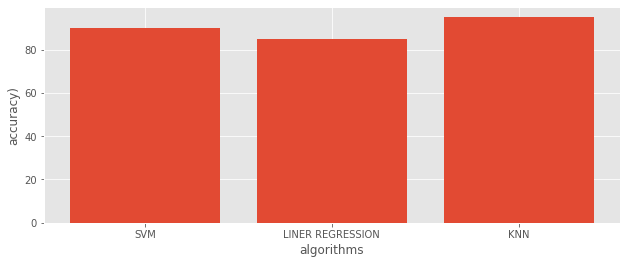

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['SVM', 'LINER REGRESSION', 'KNN']
plt.xlabel('algorithms')
plt.ylabel('accuracy)')
accuracy = [90,85,95]
width = 0.15
ax.bar(algorithms,accuracy)
#plt.rcParams["figure.figsize"] = (20,10)
#plt.rcParams['figure.figsize'] = (8,3)
plt.savefig('bar.png')
plt.rcParams['figure.figsize'] = (16,9)
plt.show()

